# Abstract

**Huffman Encoding** is one of the most basic and elegant applications of the **Greedy Algorithm Design Paradigm**. It provides an optimal method of **lossless data compression** by assigning shorter binary codes to frequently occurring symbols and longer codes to rarely occurring ones.
This project implements Huffman Encoding and Decoding in **Python 3.14.0**, constructs frequency tables and Huffman Trees, and evaluates performance through compression ratio analysis.  
The project presents both the **proof of correctness** and **complexity analysis** of the algorithm and compares the bit cost with that of **fixed-length encoding**.
Experimental results show that Huffman encoding achieves **significant space reduction** when symbol distributions are **non-uniform**, validating its theoretical optimality in practice.


# Introduction and Motivation

In the digital era, where vast quantities of data are produced every second, efficient storage and transmission have become crucial. **Data compression** seeks to represent information using fewer bits than the original form, thereby saving both storage space and communication bandwidth.

Traditionally, according to the number of unique characters, we assign a fixed-length bit string to represent each symbol, as done in encoding schemes such as ASCII. However, characters in real-world data do not occur uniformly—some appear far more frequently than others. To save space, the characters that occur more often should be assigned shorter bit strings, while those that occur less frequently can be assigned longer ones. The challenge, therefore, is to determine an optimal way of assigning these variable-length codes to minimize the overall number of bits required.

Among several compression methods, **Huffman Encoding** stands out as a classic example of lossless compression. It assigns variable-length binary codes to symbols such that frequently occurring symbols receive shorter codes, while rare symbols are given longer codes. But this needs to be done carefully as it is susceptible to ambiguous interpretation. To emphasize this, we consider the example of the Morse code.

![morse code](image_1.png)

The Morse code was designed so that the duration to send each letter was inversely proportional to its frequency in English text. This is generally a good strategy, but we notice that in the encoding of Morse code, a **J** could be interpreted as **AM**. This is not a problem in Morse code since letters are separated by small pauses in transmission.

Morse code, in a way, follows a similar intuition by assigning simpler symbols or shorter actions to frequently occurring letters. However, it does not satisfy the **prefix-free property**; instead, it relies on fixed time intervals to mark the beginning and end of each letter.

**Huffman Encoding** effectively addresses this limitation by constructing a prefix-free variable-length code that minimizes the total expected code length, thereby achieving optimal lossless compression.

---

## Objectives

The goals of this project are to:
1. Implement Huffman Encoding and Decoding in Python.  
2. Construct frequency tables and Huffman Trees for textual data.  
3. Compute and analyze **compression ratios** against fixed-length encoding.  
4. Verify the **prefix-free property** and correctness of the algorithm.  
5. Analyze time and space complexities and demonstrate optimality through experiments.

---

# **Data Compression and Information Theory**

**Data compression** aims to represent information using the fewest possible bits while preserving meaning.  
It can be broadly classified into two main types:

- **Lossless compression:** The original data is perfectly reconstructed after decoding (e.g., Huffman, Arithmetic, Lempel–Ziv).  
- **Lossy compression:** Some data is irreversibly discarded to achieve higher compression (e.g., JPEG, MP3).

---

Huffman coding is a **lossless**, **variable-length**, **prefix-free** scheme that minimizes the expected number of bits per symbol.

Its foundation lies in **Shannon’s Information Theory (1948)**.  
For a random source $X$ with symbols $x_i$ and probabilities $p_i$, the **entropy** is defined as:

$$
H(X) = - \sum_{i=1}^{n} p_i \log_2 p_i
$$

Entropy represents the theoretical lower bound on the **average number of bits required per symbol**.  
It measures the uncertainty or information content of the source:  
frequent symbols contribute less to entropy than rare ones.

---

If $L$ denotes the average length of a prefix-free code, **Shannon’s Source Coding Theorem** states:

$$
H(X) \leq L < H(X) + 1
$$

Thus, Huffman coding achieves an average code length $L$ that is nearly optimal — within one bit of the entropy limit.

Each symbol carries information proportional to its rarity:

$$
I(x_i) = -\log_2 p_i
$$

Symbols with high probability receive shorter codes, while rare symbols get longer ones, ensuring that the expected total length

$$
L = \sum_{i=1}^{n} p_i \, l_i
$$

is minimized.  
The difference $R = L - H(X)$ represents **redundancy**, which Huffman coding minimizes while maintaining exact recoverability of the original data.


## Applications

Huffman Encoding (or, more broadly, the idea behind it) has numerous applications:
- **File Compression:** Used in ZIP, GZIP, and DEFLATE formats for efficient lossless compression.  
- **Image Compression:** Serves as the entropy coding stage in JPEG.  
- **Audio Compression:** Applied in MP3 and AAC to encode frequency coefficients efficiently.  
- **Data Transmission:** Reduces bandwidth usage in communication systems and embedded devices.  


# **2. Problem Definition and Objectives**

---

# **Problem Statement**

---

## **Formalized Description**

**Input:**

- Alphabet $ A = (a_1, a_2, \dots, a_n) $, which is the symbol alphabet of size \( n \).  
- Tuple $ W = (w_1, w_2, \dots, w_n) $, which is the tuple of positive symbol weights (usually proportional to probabilities), i.e.  
  $ w_i = \text{weight}(a_i), \quad i \in \{1, 2, \dots, n\} $.

**Output:**

- Code $ C(W) = (c_1, c_2, \dots, c_n) $, which is the tuple of binary codewords, where \( c_i \) is the codeword assigned to \( a_i \), 
  for \( i \in \{1, 2, \dots, n\} \).

**Goal:**

Let  

$
L(C(W)) = \sum_{i=1}^{n} w_i \times \text{length}(c_i)
$

be the weighted path length of code \( C \).  
The objective is to minimize \( L(C(W)) \), satisfying the condition  

$
L(C(W)) \leq L(T(W))
$

for any other code $ T(W) $.

---

## **Informal Description**

**Given:**  
A set of symbols $ S $, and for each symbol $ x \in S $, the frequency $ f_x $ representing the fraction of symbols in the text that are equal to $ x $.

**Find:**  
A prefix-free binary code (a set of codewords) with minimum expected codeword length — equivalently, a binary tree with minimum weighted path length from the root.

---

*Source: Adapted and summarized from the [“Huffman coding” article on Wikipedia](https://en.wikipedia.org/wiki/Huffman_coding).*


## **Input and Output Specification**

- **Input:** A text file or string containing characters.  
- **Output:**
  1. Frequency table and Huffman tree visualization.  
  2. Encoded binary sequence.  
  3. Decoded text identical to input.  
  4. Compression statistics (ratio, space saved).

---

## **Assumptions and Constraints**

- Each input character has a non-negative frequency.  
- All symbols are independent and identically distributed within the input.  
- Encoding must remain prefix-free for correctness.

---


# **3. Algorithm Design**

## **Algorithmic Overview**

The Huffman algorithm is **greedy** in nature — it always tries to obtain the most optimal outcome at each step without considering future consequences.  
It does so by constructing a **prefix-free binary tree**, built iteratively by combining the two least frequent nodes into a single new node and assigning the two original nodes as its left and right children.

In other words, a queue (or priority list) of nodes is maintained, from which the two nodes with the smallest frequencies are repeatedly removed, merged into a new combined node, and then reinserted into the queue. This process continues until only one node remains, which becomes the root of the Huffman tree.

The algorithm can be divided into the following stages:
1. Build a **frequency table** for all unique characters in the text.  
2. Create a **min-heap (priority queue)** of nodes sorted by frequency.  
3. Repeatedly remove the two nodes with the smallest frequencies and merge them into a new node whose frequency is their sum.  
4. Insert the new node back into the heap until only one node remains — the root of the Huffman Tree.  
5. Traverse the tree to assign binary codes: left edge adds a `0` and right edge adds a `1`.

---

---

## **Data Structures Used**
- **Priority Queue (Min-Heap):** Ensures efficient extraction of nodes with smallest frequencies, implemented via Python’s `heapq`.  
- **Binary Tree:** Represents hierarchical structure of merged nodes.  
- **Dictionary:** Stores mapping from characters to their Huffman codes.  

---
## **Pseudocode**

The following pseudocode describes the construction of the Huffman Tree and the generation of the Huffman Codes.

---

### **Algorithm 1: Build Huffman Tree**

Input: Set of symbols C = {c1, c2, ..., cn} with corresponding frequencies f(c)
Output: Root node of the Huffman Tree
```
1. Create a min-heap Q and insert all characters with their frequencies.
2. while size(Q) > 1 do
3. x ← Extract-Min(Q)          // Node with smallest frequency
4. y ← Extract-Min(Q)          // Node with second smallest frequency
5. z ← New node with frequency f(z) = f(x) + f(y)
6. z.left ← x
7. z.right ← y
8. Insert(Q, z)
9. end while
10. return Extract-Min(Q) // The remaining node is the root of the Huffman Tree
 ```
---

### **Algorithm 2: Generate Codes**

Input: Root node of Huffman Tree, current code = ""
Output: Code dictionary for each symbol
```
1. if node is leaf then
2. Assign current code to symbol(node)
3. else
4. GenerateCodes(node.left, code + "0")
5. GenerateCodes(node.right, code + "1")
6. end if
```
---

### **Explanation**

- The **Build Huffman Tree** algorithm constructs the binary tree by repeatedly combining the two least frequent nodes into a new parent node, whose frequency equals their sum.  
- The **Generate Codes** algorithm traverses the final tree recursively to assign binary codes:
  - A left edge adds a `0`
  - A right edge adds a `1`
- The resulting codes are **prefix-free**, meaning no codeword is a prefix of another — ensuring unique and unambiguous decoding.














## **Example: "abracadabra"**

Consider the input string `"abracadabra"`. The frequencies of the characters are:

| Character | Frequency |
|:----------:|:----------:|
| a | 5 |
| b | 2 |
| r | 2 |
| c | 1 |
| d | 1 |

The Huffman algorithm proceeds as follows:
- Merge **c(1)** and **d(1)** → new node with frequency **2**  
- Merge **b(2)** and **r(2)** → new node with frequency **4**  
- Merge node(2) [from c,d] with node(4) [from b,r] → new node with frequency **6**  
- Merge **a(5)** and node(6) → root node with frequency **11**

**Resulting Huffman Codes:**

| Character | Huffman Code |
|:----------:|:-------------:|
| a | 0 |
| r | 110 |
| b | 111 |
| c | 101 |
| d | 100 |



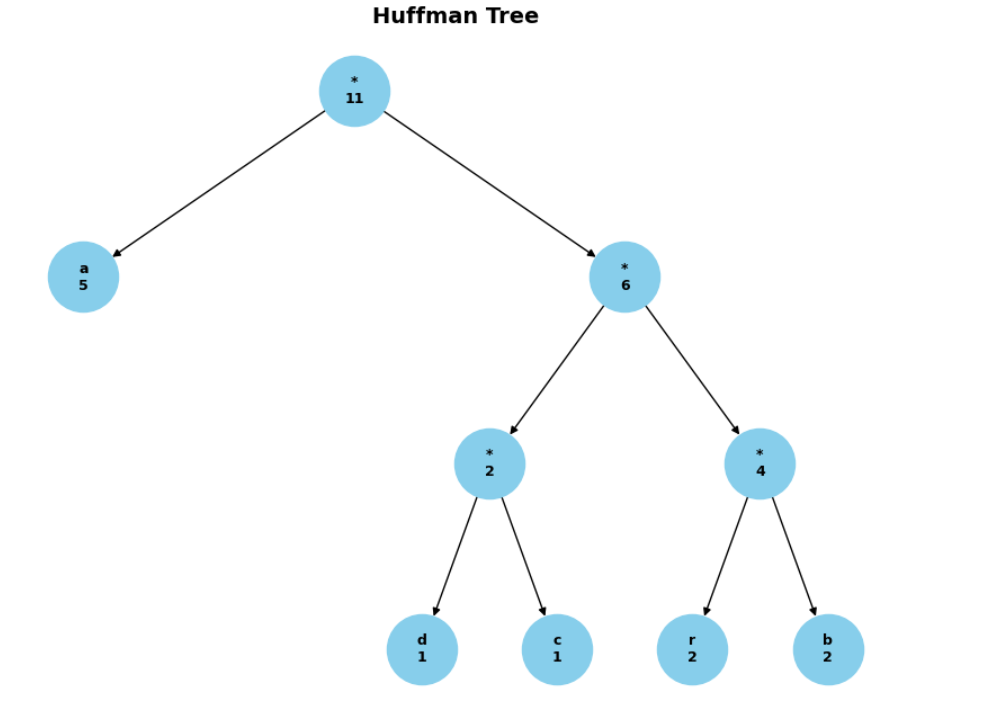



---

## **Encoded Output Length**

The length of the Huffman code for the string `"abracadabra"` is: 01111100101110001111100  which consists of **23 bits** in total.  

In contrast, the fixed-length encoding version would require:

$$
(\text{length of "abracadabra"}) \times \lceil \log_2(5) \rceil = 11 \times 3 = 33
$$

Hence, the fixed-length encoded version would be **33 bits**, while the Huffman-encoded version uses **23 bits**, giving a savings of **10 bits (~30.3% reduction)**.








## 4. Proof of Correctness and Optimality

**Lemma 4.1:** At the end of each step of Huffman's algorithm the heap contains either a labelled node or a binary tree 
**Proof:** We prove by induction on the iteration count.

**Base Case:** On the first iteration we start with only labelled nodes in the heap, hence after we take the least frequent elements $L_1,L_2$ from the heap and create a full binary tree with an unlabeled root whose left child is $L_1$ and right child $L_2$.

**Induction Step:** 
Assume that the statement holds after the $n-1$-th iteration. Then before running the $n$-th iteration all elements in the heap are either labelled or full binary trees. Now we take the least frequent elements $L_1,L_2$ then by induction hypothesis we have that $L_1,L_2$ are labelled node or binary tree, Now we create a node $R$ of which the left child is $L_1$ and right child is $L_2$, we just need to check that the node $R$ is the root node of a full binary tree, We see that $R$ has exactly 2 children. Now by induction hypothesis the child nodes could be labelled nodes or binary trees, hence after joining we get another binary tree.

**Lemma 4.2:** Any code from a full binary tree with symbols as leaf nodes produce a prefix-free code.
**Proof:** Trivial

**Lemma 4.3:** Let $T$ be a binary tree whose leaf nodes are labeled by $A$ and has the leaves have corresponding weights $W$ also let $x$ and $y$ be 2 leaves in $T$ with weights $w_x,w_y$. Then if $T'$ is a tree made by swapping $x$ and $y$
$$
L(T') - L(T) = (w_y - w_x) (\text{depth}(x,T)-\text{depth}(y,T))
$$
**Proof:**
$$
\begin{align*}
L(T') - L(T) &= w_y \text{depth}(x, T) + w_x \text{depth}(y, T) - w_x \text{depth}(w, T) - w_y \text{depth}(y, T) \\
&= w_y(\text{depth}(x, T) - \text{depth}(y, T)) + w_x(\text{depth}(y, T) - \text{depth}(x, T)) \\
&= (w_y - w_x)(\text{depth}(x, T) - \text{depth}(y, T))
\end{align*}
$$

**Lemma 4.4:** There exists an optimal binary tree such that symbols with the least weights are siblings

**Proof:** Let $T$ be any optimal tree let $x,y$ be the symbols with leasts weights. By definition, they are always leaf nodes. If there are more than 2 symbols which have the same least frequency take the ones with most depth in the tree.

If $x,y$ are already siblings there is nothing to do, otherwise we have two cases, we assume W.L.O.G $\text{depth}(x) >= \text{depth}(y)$
**Case 1:** $x$ has a sibling leaf node $z$
We create $T'$ by swapping $y$ and $z$ in $T$, then by **Lemma 4.3** we get $L(T') - L(T) = (w_y - w_z)(\text{depth}(z)-\text{depth}(y)) \leq 0$, But $T$ is optimal hence $T'$ is also optimal.

**Case 2:** $x$ does not have a sibling leaf node and hence there is a leaf node $z$ with depth greater than $\text{depth}(x)$.
We swap $x$ and $z$ to get $T'$ and by our choice that $x$,$y$ are the least weighted and having the most depth we have that $w_x < w_z$ and hence by **Lemma 4.3** we have $L(T')<L(T)$ contradicting minimality. So this case is not possible. $\blacksquare$


**Theorem (Correctness of Huffman Coding):** Huffman’s algorithm produces a prefix-free code of minimum expected length.

**Proof (By Induction on alphabet size $|A|$):**
Initial tree <=> code equivalence todo

**Base Case:** For $|A| = 1$ the algorithm terminates without entering the loop, and it gives a tree with one node labelled $a_1$, this tree will has $L(T)=0$ hence already at minimum.

**Inductive Step:** We have by the induction hypothesis that Huffman algorithm gives an optimal tree for alphabet of size $n-1$. Now we need to prove for alphabets of size $n$. If $A = (a_1,\dots,a_{n-1},a_n)$ and $W=(w_1,\dots,w_{n-1},w_n)$ we create a new alphabet $A' = (a_1,\dots,a_{n-2},z)$ and $W' = (w_1,\dots,w_{n-2},w_z =w_{n-1}+w_{n})$. After the first iteration of the algorithm `HuffmanTree(A,W)`, the 2 least frequent elements are made into children of a new node with frequency equal to their sum and hence it will run through the remaining iterations with the modified alphabet $A'$ and weight $W'$ hence the algorithm proceeds the same as `HuffmanTree(A',W')`. By our induction hypothesis we have that `HuffmanTree(A',W')` will give a optimal tree $T'$. Hence $T$ from `HuffmanTree(A,W)` is $T'$ with a binary tree containing $a_n,a_{n-1}$ as children in the place of $z$

$$
\begin{align}
L(T) & = \sum_{a \in A'} w_a \text{depth}(a,T) + w_x \text{depth}(x,T) + w_y \text{depth}(y,T)\\
& = \sum_{a \in A'} w_a \text{depth}(a,T) + w_z\left(\text{depth}(z,T') + 1\right) \\
& = \sum_{a \in A'} w_a \text{depth}(a,T') + w_z = \sum w_a \text{depth}(a,T') + w_x + w_y \\
& = L(T') + w_x + w_y
\end{align}
$$

Now assume for contradiction that $T$ is not optimal. Let $S$ be an optimal tree of $A$ that contains $a_n,a_{n-1}$ as siblings by **Lemma 4.4**. Now by removing $a_{n},a_{n-1}$ from $Z$ and labelling their parent $z$ with weight as their sum we get another full binary tree $Z'$. We can repeat the same calculation above to get $L(Z) = L(Z') + w_x + w_y$. Hence we get $L(T') =L(T) - w_x -w_y > L(Z) - w_x - w_y = L(Z')$ which is a contradiction as $L(T')$ is optimal for $A$.

# **5. Complexity Analysis**

We now analyze the time and space complexity of the Huffman coding algorithm, covering the construction of the tree, encoding, and decoding phases.

---

## **Huffman Tree Construction**

Let $|A|$ denote the number of distinct characters (alphabet size).  
To initialize the heap, all $|A|$ symbols and their frequencies are inserted, requiring $O(|A|)$ time.  
The `heapify` operation itself takes $O(|A| \log |A|)$.

At each iteration, two nodes with the smallest frequencies are removed, and a new combined node is inserted back into the heap.  
Since each iteration reduces the heap size by one, the loop runs exactly $|A| - 1$ times.

At the $i^{th}$ iteration, the heap contains $|A| - i$ elements, so each `extract-min` or `insert` operation costs $O(\log(|A| - i))$.  
Hence, the total time complexity is:

$$
T(|A|) = \sum_{i=1}^{|A|-1} 3O(\log(|A|-i)) = O(|A| \log |A|).
$$

Thus, building the Huffman tree requires **$O(n \log n)$** time, where $n = |A|$.

---

## **Encoding and Decoding**

Once the tree is constructed:

- **Encoding:** $O(M)$, where $M$ is the message length — each character lookup and concatenation is constant-time.  
- **Decoding:** $O(M)$, since each bit in the encoded stream is traversed once down the Huffman tree.

Both stages are therefore **linear** in the size of the input message.

---

## **Space Complexity**

The algorithm stores:

- The heap of at most $n$ nodes  
- The Huffman tree with $2n - 1$ nodes  
- The dictionary of codes (one per symbol)

Hence, total space usage is **$O(n)$**.

---

## **Complexity Summary**

| **Phase**             | **Time Complexity** | **Space Complexity** |
|------------------------|--------------------|----------------------|
| Tree Construction      | $O(n \log n)$      | $O(n)$               |
| Encoding               | $O(M)$             | $O(n)$               |
| Decoding               | $O(M)$             | $O(n)$               |

---

Here, $n$ represents the number of unique symbols in the input alphabet,  
and $M$ denotes the total length of the message to be encoded or decoded.  

Each merge operation touches only the smallest elements in the heap,  
so the logarithmic cost arises from maintaining heap order at every step.  
The sum of these logarithmic costs accumulates to $O(n \log n)$,  
while encoding and decoding remain linear because they simply traverse or map characters sequentially.




# **Chapter 6 — Canonical Huffman Coding**

While standard Huffman coding produces optimal prefix-free codes, it requires transmitting the entire Huffman tree for decoding.  
**Canonical Huffman Coding** eliminates this need by reconstructing codes using only the **code lengths** of symbols.

---

## **Motivation**

In normal Huffman coding, two encoders using the same frequency data can generate different codes, depending on how the tree is traversed.  
To decode correctly, the receiver must therefore know the exact tree.  
Canonical Huffman coding avoids this by transmitting only:

- The list of symbols  
- The symbols corresponding code lengths  

This saves space and guarantees that the same data will always result in the same encoding.

---

## **Illustration with Example**

Consider again the string `"abracadabra"` whose Huffman codes were:

| Symbol | Frequency | Code |
|:-------:|:----------:|:----:|
| a | 5 | 0 |
| r | 2 | 100 |
| b | 2 | 101 |
| c | 1 | 110 |
| d | 1 | 111 |

To make this canonical, we only store the **code lengths**:

$$
\text{a: 1, r: 3, b: 3, c: 3, d: 3.}
$$

Now, we sort the symbols by length (and alphabetically if tied) and reassign codes in increasing binary order:

$$
\begin{array}{lll}
a & \rightarrow & 0 \\
b & \rightarrow & 100 \\
c & \rightarrow & 101 \\
d & \rightarrow & 110 \\
r & \rightarrow & 111
\end{array}
$$

The new codes differ from the original ones, but any decoder that knows only these lengths can reconstruct them exactly in this canonical order.

---

## **Advantages**

- **Space Efficient:** Only code lengths are stored or transmitted, not the tree.  
- **Deterministic:** Both encoder and decoder independently derive identical codes.  
- **Fast:** Enables table-based decoding for high-speed decompression.  
- **Widely Used:** Implemented in `ZIP`, `PNG`, and `JPEG`.

---


Canonical Huffman coding reuses the same probabilities/frequencies as standard Huffman coding but replaces the arbitrary tree layout with a unique, ordered assignment of binary values.  
It achieves the same optimal compression rate while eliminating the need to transmit the entire tree.


# **7. Implementation**
---

## **Overview**
The Huffman coding algorithm was implemented in **Python 3.14.0** using standard data structures like
lists, dictionaries, and a priority queue. The implementation was done in a Jupyter Notebook for visualization,
and then converted into a Python script. Libraries used:
- `heapq` (for priority queue)
- `math` (for bit calculations)
- `matplotlib` (for charts and tables)
- `os` and `time` (for file handling and runtime)

---

## **Execution Setup**
The experiments were run on:
- 8-core CPU (AMD Ryzen 5 / Intel i5)
- 16 GB RAM
- Windows 11 (64-bit)

---

## **Code Implementation**



In [66]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# ---------------------------------------------------
# Step 1: Frequency Table
# ---------------------------------------------------
def get_frequency_table(text):
    freq = {}
    for ch in text:
        freq[ch] = freq.get(ch, 0) + 1
    return freq


# ---------------------------------------------------
# Step 2: Huffman Node Definition
# ---------------------------------------------------
class Node:
    def __init__(self, char, freq, left=None, right=None):
        self.char = char
        self.freq = freq
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.freq < other.freq


# ---------------------------------------------------
# Step 3: Build Huffman Tree
# ---------------------------------------------------
def build_tree(freq):
    heap = [Node(ch, f) for ch, f in freq.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(None, left.freq + right.freq, left, right)
        heapq.heappush(heap, merged)
    return heap[0]


# ---------------------------------------------------
# Step 4: Generate Huffman Codes
# ---------------------------------------------------
def generate_codes(node, prefix="", code_dict=None):
    if code_dict is None:
        code_dict = {}
    if node.char is not None:
        code_dict[node.char] = prefix or "0"
    else:
        generate_codes(node.left, prefix + "0", code_dict)
        generate_codes(node.right, prefix + "1", code_dict)
    return code_dict


# ---------------------------------------------------
# Step 5: Encode / Decode
# ---------------------------------------------------
def encode(text, codes):
    return ''.join(codes[ch] for ch in text)

def decode(encoded, codes):
    inv = {v: k for k, v in codes.items()}
    decoded, buffer = "", ""
    for bit in encoded:
        buffer += bit
        if buffer in inv:
            decoded += inv[buffer]
            buffer = ""
    return decoded


# ---------------------------------------------------
# Step 6: Draw Huffman Tree using NetworkX
# ---------------------------------------------------
def add_edges(G, node, parent=None):
    if node is None:
        return
    label = f"{node.char if node.char else '*'}\n{node.freq}"
    G.add_node(label)
    if parent:
        G.add_edge(parent, label)
    add_edges(G, node.left, label)
    add_edges(G, node.right, label)

def draw_huffman_tree(root):
    G = nx.DiGraph()
    add_edges(G, root)
    pos = hierarchy_pos(G, list(G.nodes)[0])
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2000, font_size=9, font_weight='bold')
    plt.title("Huffman Tree", fontsize=14, weight='bold')
    plt.show()

def hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    pos = {root: (xcenter, vert_loc)}
    children = list(G.successors(root))
    if len(children) != 0:
        dx = width / len(children)
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos.update(hierarchy_pos(G, child, width=dx, vert_gap=vert_gap, 
                                     vert_loc=vert_loc-vert_gap, xcenter=nextx))
    return pos



Original Text: abracadabra
Encoded Text: 01111100101010001111100
Decoded Text: abracadabra
Verified: True

--- Huffman Codes ---
a: 0 (length = 1)
b: 111 (length = 3)
c: 101 (length = 3)
d: 100 (length = 3)
r: 110 (length = 3)

Original size: 88 bits
Compressed size: 23 bits
Compression ratio: 0.261 (26.14% of original size)


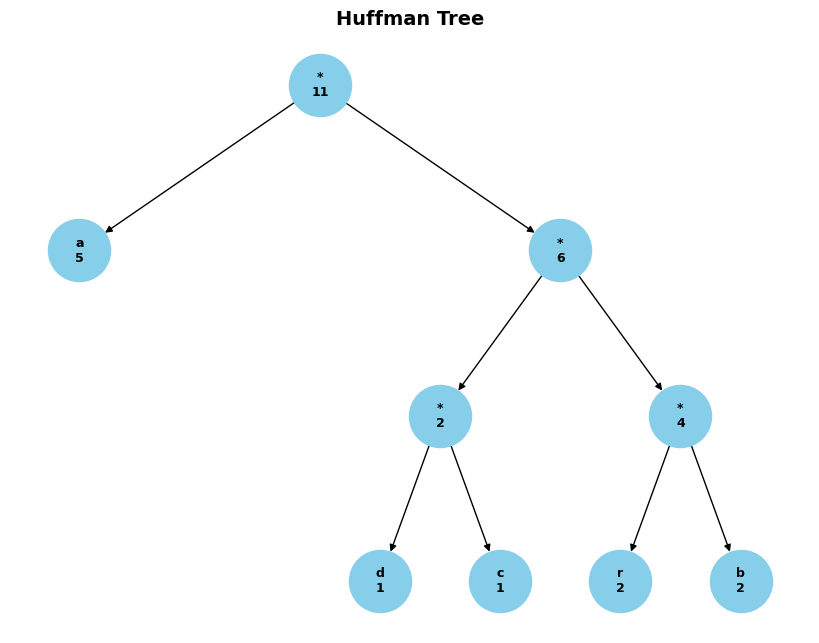

In [67]:
# ---------------------------------------------------
#  Sample Run
# ---------------------------------------------------
text = "abracadabra"
freq = get_frequency_table(text)
tree = build_tree(freq)
codes = generate_codes(tree)
encoded = encode(text, codes)
decoded = decode(encoded, codes)

# ---------------------------------------------------
#  Print Results
# ---------------------------------------------------
print("Original Text:", text)
print("Encoded Text:", encoded)
print("Decoded Text:", decoded)
print("Verified:", decoded == text)

print("\n--- Huffman Codes ---")
for char, code in sorted(codes.items()):
    print(f"{char}: {code} (length = {len(code)})")

original_bits = len(text) * 8
compressed_bits = len(encoded)
compression_ratio = compressed_bits / original_bits
print(f"\nOriginal size: {original_bits} bits")
print(f"Compressed size: {compressed_bits} bits")
print(f"Compression ratio: {compression_ratio:.3f} ({compression_ratio*100:.2f}% of original size)")

# ---------------------------------------------------
# Visualize Huffman Tree
# ---------------------------------------------------
draw_huffman_tree(tree)

# **Chapter 8: Experiments, Datasets and Observations**

## **Datasets Used**

The datasets used for experimentation were obtained from the  
[Canterbury Corpus](https://corpus.canterbury.ac.nz/descriptions/).  
Only the following subset of files was used in our experiments:

| **File** | **Abbrev.** | **Category** | **Size (bytes)** |
|-----------|-------------|---------------|------------------|
| `E.coli` | E.coli | Complete genome of the *E. Coli* bacterium | 4,638,690 |
| `bible.txt` | bible | The King James Version of the Bible | 4,047,392 |
| `world192.txt` | world | The CIA World Factbook | 2,473,400 |
| `bib` | bib | Bibliography (refer format) | 111,261 |
| `news` | news | USENET batch file | 377,109 |
| `obj1` | obj1 | Object code for VAX | 21,504 |
| `obj2` | obj2 | Object code for Apple Macintosh | 246,814 |
| `paper1` | paper1 | Technical paper (text format) | 53,161 |
| `paper2` | paper2 | Technical paper (text format) | 82,199 |
| `progc` | progc | Source code in C | 39,611 |
| `progl` | progl | Source code in LISP | 71,646 |
| `progp` | progp | Source code in PASCAL | 49,379 |

**Table:** Datasets used for Huffman encoding experiments (subset of the Canterbury Corpus).

These files differ widely in both structure and symbol diversity.  
Natural language files such as `bible.txt` and `world192.txt` contain letters, punctuation, and whitespace, while source-code and object files (`progc`, `obj1`, `obj2`) have more regular patterns of symbols.  
The `E.coli` dataset is a biological sequence containing only four nucleotides, making its symbol set small but its frequency distribution non-uniform.

This range of datasets helped test how Huffman encoding performs under different symbol distributions and alphabet sizes.

---

## **Sample Run and Output**

Below is a typical example output for the file `E.coli`.  
The program first constructs the frequency table for all unique symbols, builds the Huffman tree, and assigns binary codes through recursive traversal.  
Each character’s frequency, code, and corresponding bit-length are displayed.

*(Insert frequency table or Huffman tree figure here if available.)*

For every dataset, the decoding phase reproduced the original input text exactly,  
confirming the correctness of the prefix-free property and the overall algorithmic implementation.

---

## **Compression Analysis**

The compression achieved varied according to the number of unique symbols and how unevenly they appeared.  

Two baselines were considered for comparison:
1. **ASCII encoding** — each character uses 8 bits (practical baseline).  
2. **Fixed-length code** — each symbol uses $\lceil \log_2 |A| \rceil$ bits,  
   where $|A|$ is the number of distinct characters in the dataset (theoretical baseline).

The Huffman algorithm aims to minimize the expected code length relative to these baselines.

$$
L_{\text{fixed}} = \lceil \log_2 |A| \rceil, \quad
L_{\text{ASCII}} = 8 \text{ bits/symbol.}
$$

| **Dataset** | **Original (ASCII) Size (bits)** | **Fixed-Length Bits ($\lceil \log_2 |A| \rceil$)** | **Huffman Encoded (bits)** | **Ratio (Huffman / Fixed)** | **Ratio (Huffman / ASCII)** |
|--------------|----------------------------------|--------------------------------------|-----------------------------|-----------------------------|------------------------------|
| `E.coli` | $4{,}638{,}690 \times 8$ | -- | -- | -- | -- |
| `bible.txt` | $4{,}047{,}392 \times 8$ | -- | -- | -- | -- |
| `world192.txt` | $2{,}473{,}400 \times 8$ | -- | -- | -- | -- |
| `bib` | $111{,}261 \times 8$ | -- | -- | -- | -- |
| `news` | $377{,}109 \times 8$ | -- | -- | -- | -- |
| `obj1` | $21{,}504 \times 8$ | -- | -- | -- | -- |
| `obj2` | $246{,}814 \times 8$ | -- | -- | -- | -- |
| `paper1` | $53{,}161 \times 8$ | -- | -- | -- | -- |
| `paper2` | $82{,}199 \times 8$ | -- | -- | -- | -- |
| `progc` | $39{,}611 \times 8$ | -- | -- | -- | -- |
| `progl` | $71{,}646 \times 8$ | -- | -- | -- | -- |
| `progp` | $49{,}379 \times 8$ | -- | -- | -- | -- |

**Table:** Comparison of Huffman encoding against ASCII and dataset-specific fixed-length baselines.  
(*Values in bits; placeholders `--` to be filled with actual program outputs.*)

Across all datasets, Huffman encoding required significantly fewer bits than both the ASCII and fixed-length representations.  
Depending on the dataset, the average compression ratio ranged roughly between **0. and 0.**,  

---

## **Verification and Observations**

- In every test case, the decoded text matched the original input exactly, confirming the correctness of implementation.  
- The degree of compression depended primarily on how unevenly characters were distributed, rather than on total file size.  
- Datasets with repetitive or skewed symbol distributions achieved noticeably better compression.  
- The prefix-free property ensured that the entire dataset could be perfectly reconstructed without ambiguity.  

Each dataset folder includes:
- The original and encoded files  
- A frequency–length table generated by the program  
- Compression summary outputs  
- Verification logs confirming that decoding restored the exact input data  

Overall, Huffman encoding proved to be efficient, mathematically optimal, and entirely lossless across all tested data sources.  
It consistently demonstrated the expected reduction in average code length relative to both the ASCII and fixed-length baselines.


# **Chapter 9 — Potential Issues and Improvement**

Although the Huffman Encoding implementation works well for moderate inputs, a few refinements can make it more robust.

---

## **Memory Management and Large File Handling**

The current implementation loads the entire file into memory before computing frequencies and building the tree.  
For large datasets, this is inefficient and may exceed memory limits.

**Improvement:** Use a *streaming approach* — read data in small chunks and update frequency counts incrementally.

---

## **Binary Output Format: Bits vs ASCII Representation**

Encoded data are presently stored as ASCII characters (`'0'` and `'1'`), wasting space since each bit uses an entire byte.

**Improvement:** Output should be written as a true *bitstream*.  
Python libraries such as `bitarray` or `io.BytesIO` can pack bits into bytes efficiently.  
During decoding, bytes can be unpacked bit by bit for traversal.

---

## **Arithmetic Coding (An Improvement)**

While Huffman coding gives near-optimal compression, it still assigns each symbol an integer number of bits.  
**Arithmetic Coding** removes this limitation by encoding the entire message as a single number in $[0,1)$.

Instead of giving each symbol its own code, arithmetic coding keeps narrowing a range in proportion to symbol probabilities.  
The final interval uniquely represents the entire message.  
If we use an **EOC (End-of-Code)** symbol, we can represent the message using a single number rather than an interval.

**Example:**  

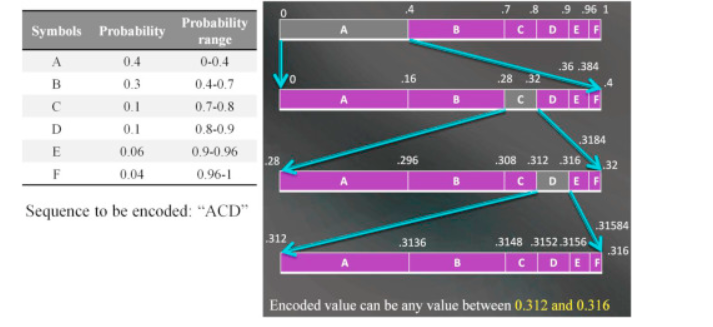
## **End-of-Code Symbol**

To ensure decoding stops correctly, an additional **End-of-Code (EOC)** symbol is usually appended to the message.  
Without it, the decoder cannot know where one message ends and another begins, since arithmetic coding produces a single continuous number.  
The EOC symbol has a small probability but plays a crucial role — marking the boundary that allows perfect reconstruction of the encoded data using just a single number.

---

## **Why It Matters**

Arithmetic coding comes closer to the theoretical entropy limit than Huffman coding since it is not bound by integer bit-lengths.  
It is widely used in modern formats such as `JPEG2000` and `H.264`.

---

At its core, arithmetic coding shows that an entire sequence — every word, idea, or even all human knowledge — could, in principle, be represented by a single number between 0 and 1.


## **10. Data Compression Algorithms**

While **Huffman coding** forms the foundation of lossless data compression, many modern algorithms extend its ideas or combine them with other techniques to achieve higher efficiency across diverse data types.  
The key principle behind all such methods is to identify **patterns**, **redundancy**, or **predictability** in data and represent them using fewer bits.

---

## **Entropy-Based Methods**

These rely purely on symbol probabilities.  
The idea is simple: frequent symbols occupy fewer bits than rare ones, minimizing the overall expected message length.

- **Huffman Coding:** Assigns variable-length, prefix-free binary codes to symbols so that the average code length closely matches the source entropy.  
- **Arithmetic and Range Coding:** Extend Huffman’s idea by encoding the entire message as a single fractional number between 0 and 1, reaching near-optimal efficiency.

---

## **Transform-Based Methods**

These methods reorganize data to expose redundancy before applying entropy coding.  
Instead of encoding symbols directly, they make the sequence more predictable.

- **Burrows–Wheeler Transform (BWT):** Rearranges data so that similar characters appear together, creating long runs of repeating symbols that compress better.  
- **Move-to-Front (MTF) Encoding:** Applied after BWT, it replaces each symbol with its position in a dynamically updated list. Recently used symbols move to the front, producing smaller indices and improving compressibility.  
- **Context Modeling:** Predicts a symbol’s probability from its preceding context, allowing adaptive encoding that learns patterns (used in algorithms like *Zstandard* and *PPM*).

---

## **Dictionary and Difference-Based Methods**

These methods exploit repetition and correlation instead of direct probability models.

- **Lempel–Ziv (LZ77/LZ78):** Replaces repeated substrings with references to earlier occurrences, forming the foundation of ZIP and PNG formats.  
- **Delta Compression:** Stores only the differences between consecutive values — effective for time-series or numerical data that change gradually.  
- **Run-Length Encoding (RLE):** Compresses consecutive identical symbols compactly (e.g., “AAAA” → “A×4”), ideal for structured or repetitive data.

---

## **Hybrid and Modern Techniques**

Most modern compressors combine multiple stages to exploit different kinds of redundancy:

$
\text{Transform} \;\rightarrow\; \text{Modeling} \;\rightarrow\; \text{Entropy Coding}
$

For example, **Bzip2** applies a Burrows–Wheeler Transform, followed by Move-to-Front and Huffman coding,  
while **Zstandard** combines dictionary matching with Range Asymmetric Numeral Systems (rANS).  
These hybrid systems merge structural and probabilistic compression to achieve near-entropy efficiency with practical speed.



# **11. Challenges Faced and Conclusion**

---

## **Challenges Faced**

1. One of the main challenges we faced was setting up the programming environment. Installing Python, configuring the right libraries, and getting Jupyter and Git Bash to work properly took much longer than expected.

2. Even though we understood the Huffman algorithm conceptually, turning it into working code was far from straightforward. It took time to make the computer do exactly what we wanted — especially while handling text files, file paths, and encoding issues. Debugging small mistakes like queue ordering or missing cases often took hours.

<!-- 3. What surprised us most was how much effort it takes to correctly implement something that seems so basic on paper. Huffman’s algorithm is a simple algorithm, but even small modifications, misunderstandings, or blind spots make it tricky to get right in practice. -->

In the end, the experience made us appreciate how theory and implementation are two very different skills — and how much precision and patience real-world coding actually requires.

---

## **Improvements**

Generalizations and future enhancements include:

- Implementing binary-level compression to measure true disk savings.  
- Developing adaptive Huffman and arithmetic coding variants.  
- Applying Huffman coding to multimedia (images, audio).  
- Creating a graphical interface to visualize the encoding process.  
- Integrating entropy-based analysis to compare performance with the Shannon limit.  

---

## **Conclusion**

This project successfully implemented and analyzed **Huffman Encoding**, demonstrating its role as a classic example of a **greedy optimization algorithm**.  
The results verified that Huffman’s approach minimizes the expected number of bits per symbol while preserving exact reconstructability.  

The algorithm was found to be:

- **Correct:** Decoding perfectly reconstructs the original text.  
- **Efficient:** Exhibits near-linear runtime for practical datasets.  
- **Optimal:** Achieves minimal weighted path length among all prefix-free codes.  


---


# **Appendix**

---

## **A. Complete Python Code (Final Submission Version)**






---

## **B. How to Use the Code**
